In [1]:
import pandas, numpy 

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [3]:
input_file = 'dose_responders_gene_results.txt'
gene_expression = pandas.read_csv(input_file,  sep='\s+', index_col=0)
gene_expression

,gene_name,PCC,dynamic_range
ensemblID,,,
ENSG00000023171,GRAMD1B,0.820274,1.618620
ENSG00000109321,AREG,0.802160,1.532610
ENSG00000004799,PDK4,0.824988,1.316810
ENSG00000172572,PDE3A,0.821435,0.814305
ENSG00000121966,CXCR4,0.890245,1.188240
...,...,...,...
ENSG00000226964,RHEBP2,-0.829000,0.564462
ENSG00000156463,SH3RF2,-0.860207,0.471868
ENSG00000171435,KSR2,-0.859553,0.369906


In [4]:
input_file = '230117_Arnar.lfq.proteins_From_Gudrun.xlsx'
df = pandas.read_excel(input_file)
df.head()

,Protein Group,Top,Accession,Significance,Coverage (%),#Peptides,#Unique,PTM,ADRNOR_4H_1_1_2792 Area,ADRNOR_4H_1_2_2793 Area,...,TNF_4H Area,ADRNOR_24H Area,ADR_24H Area,CTRL_24H Area,NOR_24H Area,TNF_24H Area,POOL Area,Group Profile (Ratio),Avg. Mass,Description
0,1659,True,Q01105|SET_HUMAN,61.25,38.28,11,11,Deamidation (NQ),66207.93000,64782.70300,...,81107.9400,98496.01600,87415.87500,103506.5900,75880.66400,121937.48400,104535.27000,1.00:0.92:0.82:1.05:0.94:1.14:1.02:1.20:0.88:1...,33489,Protein SET OS=Homo sapiens OX=9606 GN=SET PE=...
1,1106,True,P30520|PURA2_HUMAN,45.54,36.18,14,14,Carbamidomethylation; Deamidation (NQ); Oxidat...,37504.72700,38062.02700,...,72672.8600,60703.20300,53407.13000,77803.8050,45081.79000,64530.84000,61178.14000,1.00:0.99:1.05:0.96:1.41:1.18:1.04:1.51:0.87:1...,50097,Adenylosuccinate synthetase isozyme 2 OS=Homo ...
2,5753,True,H3BSJ5|H3BSJ5_HUMAN,9.74,13.78,2,2,NaN,710.18670,1787.54140,...,745.0441,970.74500,1280.93070,1131.4752,1574.30470,1760.64750,1590.41820,1.00:1.01:0.82:1.45:0.70:0.91:1.20:1.06:1.48:1...,31232,Ubiquinone biosynthesis protein OS=Homo sapien...
3,189,True,Q92900|RENT1_HUMAN,37.55,49.07,40,40,Carbamidomethylation; Deamidation (NQ); Oxidat...,50964.09400,57867.21000,...,48297.3050,32894.06600,22484.96300,17478.6330,49582.24600,17853.52300,49794.11300,1.00:1.25:1.19:1.66:1.18:0.80:0.55:0.43:1.21:0...,124345,Regulator of nonsense transcripts 1 OS=Homo sa...
4,6355,True,B7ZBQ3|B7ZBQ3_HUMAN,78.08,9.66,1,1,Carbamidomethylation,328.46777,359.28754,...,558.0640,735.69476,709.92926,1059.3608,401.92883,776.32916,701.92194,1.00:0.89:0.54:0.73:0.96:1.26:1.22:1.82:0.69:1...,15923,Mediator of RNA polymerase II transcription su...


In [5]:
subset = []
for element in df.columns:
    if 'ADRNOR_24H_' in element:
        subset.append(element)
    if 'CTRL_24H_' in element:
        subset.append(element)

print(len(subset), subset)
useful_info = ['Accession', 'Description'] + subset
wdf = df.loc[:, useful_info]
wdf.head()

12 ['ADRNOR_24H_1_1_2931 Area', 'ADRNOR_24H_1_2_2932 Area', 'ADRNOR_24H_2_1_2934 Area', 'ADRNOR_24H_2_2_2935 Area', 'ADRNOR_24H_3_1_2937 Area', 'ADRNOR_24H_3_2_2938 Area', 'CTRL_24H_1_1_2840 Area', 'CTRL_24H_1_2_2841 Area', 'CTRL_24H_2_1_2843 Area', 'CTRL_24H_2_2_2844 Area', 'CTRL_24H_3_1_2846 Area', 'CTRL_24H_3_2_2847 Area']


,Accession,Description,ADRNOR_24H_1_1_2931 Area,ADRNOR_24H_1_2_2932 Area,ADRNOR_24H_2_1_2934 Area,ADRNOR_24H_2_2_2935 Area,ADRNOR_24H_3_1_2937 Area,ADRNOR_24H_3_2_2938 Area,CTRL_24H_1_1_2840 Area,CTRL_24H_1_2_2841 Area,CTRL_24H_2_1_2843 Area,CTRL_24H_2_2_2844 Area,CTRL_24H_3_1_2846 Area,CTRL_24H_3_2_2847 Area
0,Q01105|SET_HUMAN,Protein SET OS=Homo sapiens OX=9606 GN=SET PE=...,94837.9400,96055.1600,107351.44000,107292.0000,93833.7500,91605.8300,93979.19000,92651.98000,91497.41400,97072.84000,122365.5000,123472.6400
1,P30520|PURA2_HUMAN,Adenylosuccinate synthetase isozyme 2 OS=Homo ...,59390.5080,61167.1640,53308.92600,49291.3800,70160.6250,70900.6400,86652.80000,85283.51600,75994.62500,79067.91000,70992.2300,68831.7600
2,H3BSJ5|H3BSJ5_HUMAN,Ubiquinone biosynthesis protein OS=Homo sapien...,628.4812,613.6859,1199.41080,1429.0657,1003.8862,949.9403,1524.00400,862.63025,744.16425,785.13696,1828.9692,1043.9463
3,Q92900|RENT1_HUMAN,Regulator of nonsense transcripts 1 OS=Homo sa...,18837.9880,21723.4670,30802.30300,59441.9100,19018.4980,47540.2400,17714.23800,20218.62900,16522.18200,17192.16000,15175.9620,18048.6300
4,B7ZBQ3|B7ZBQ3_HUMAN,Mediator of RNA polymerase II transcription su...,932.6975,800.1888,800.47003,730.2368,552.3179,598.2577,840.52606,783.27770,1087.00700,1446.91260,1085.2957,1113.1461


starting from 84 genes
testing GRAMD1B
testing AREG
testing PDK4
testing PDE3A
testing CXCR4
	 gene CXCR4 maps to 1 proteins
		 Description:  C-X-C chemokine receptor type 4 OS=Homo sapiens OX=9606 GN=CXCR4 PE=1 SV=1
		 mRNAfc 0.890245
		 PT fc 0.3284285876262629
testing NR4A3
testing AL139393.3
testing NR4A2
testing STC1
testing DUSP4
testing FGF18
testing CTH
testing TNFSF15
testing IL11
testing DAW1
testing CHRNA9
testing GNAL
testing SLC7A2
	 gene SLC7A2 maps to 1 proteins
		 Description:  Cationic amino acid transporter 2 OS=Homo sapiens OX=9606 GN=SLC7A2 PE=1 SV=2
		 mRNAfc 0.868314
		 PT fc -0.3402044610314121
testing LINC00313
testing CHMP1B
	 gene CHMP1B maps to 1 proteins
		 Description:  Charged multivesicular body protein 1b OS=Homo sapiens OX=9606 GN=CHMP1B PE=1 SV=1
		 mRNAfc 0.867763
		 PT fc 0.45655965908060026
testing CHMP1B-AS1
testing SOCS2
testing CLCF1
testing CREM
testing TFPI2
	 gene TFPI2 maps to 1 proteins
		 Description:  Tissue factor pathway inhibitor 2 OS=H

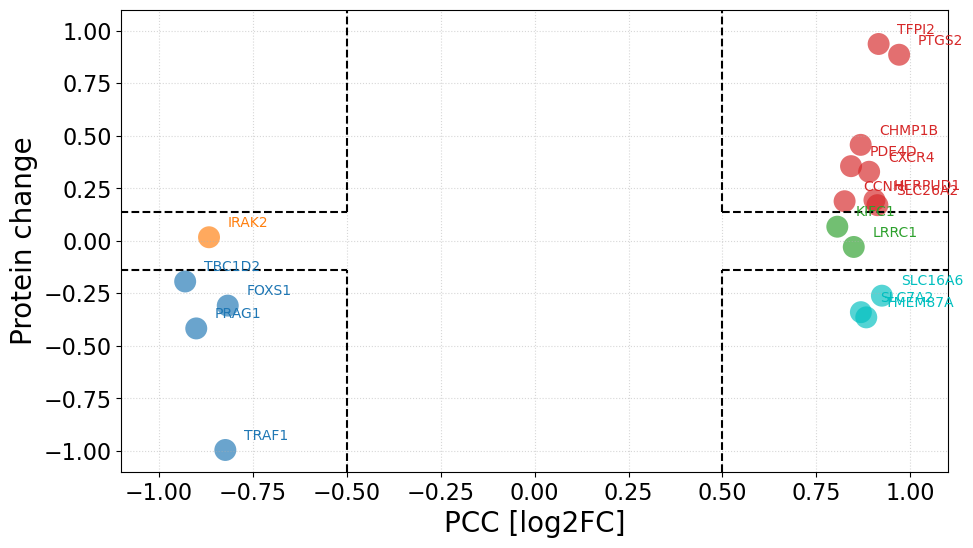

In [6]:
print('starting from {} genes'.format(gene_expression.shape[0]))
mapped = 0
for element in gene_expression['gene_name']:
    print('testing {}'.format(element))
    rule1 = wdf['Description'].str.contains('GN={} '.format(element))
    rule2 = wdf['Description'].str.contains('Fragment')
    subset = wdf[(rule1 == True) & (rule2 == False)]
    a = subset.shape[0]
    if a != 0:
        print('\t gene {} maps to {} proteins'.format(element, a))
        print('\t\t Description: ', subset['Description'].values[0])
        mapped = mapped + 1

        # retreive mRNA fold-change
        mRNAfc = gene_expression[gene_expression['gene_name'] == element]['PCC'].values[0]
        print('\t\t mRNAfc {}'.format(mRNAfc))
        
        # retrieve protein fold-change
        labels01 = subset.columns.values[[2, 3]]
        labels02 = subset.columns.values[[4, 5]]
        labels03 = subset.columns.values[[6, 7]]

        labels04 = subset.columns.values[[8, 9]]
        labels05 = subset.columns.values[[10, 11]]
        labels06 = subset.columns.values[[12, 13]]     

        #print(labels01, labels02, labels03)
        #print(labels04, labels05, labels06)
        
        adr1 = numpy.log2(subset.loc[:, labels01].median(axis=1) + 1)
        adr2 = numpy.log2(subset.loc[:, labels02].median(axis=1) + 1)
        adr3 = numpy.log2(subset.loc[:, labels03].median(axis=1) + 1)
        
        ctl1 = numpy.log2(subset.loc[:, labels04].median(axis=1) + 1)
        ctl2 = numpy.log2(subset.loc[:, labels05].median(axis=1) + 1)
        ctl3 = numpy.log2(subset.loc[:, labels06].median(axis=1) + 1)
        
        ptfc = numpy.median([adr1, adr2, adr3]) - numpy.median([ctl1, ctl2, ctl3])
        #print()
        #print(adr1, adr2, adr3, ctl1, ctl2, ctl3)
        #print(numpy.median([adr1, adr2, adr3]))
        print('\t\t PT fc {}'.format(ptfc))

        
        ptthreshold = numpy.log2(110/100)
        ppc_threshold = 0.5
        #print(ptthreshold)

        the_color='black'
        if (mRNAfc >= ppc_threshold) & (ptfc >= ptthreshold):
            the_color='tab:red'
        if (mRNAfc <= -ppc_threshold) & (ptfc <= -ptthreshold):
            the_color='tab:blue'

        if (mRNAfc >= ppc_threshold) & (-ptthreshold <= ptfc <= ptthreshold):
            the_color='tab:green'
        if (mRNAfc <= -ppc_threshold) & (-ptthreshold <= ptfc <= ptthreshold):
            the_color='tab:orange'

        if (mRNAfc <= -ppc_threshold) & (ptfc >= ptthreshold):
            the_color='magenta'
        if (mRNAfc >= ppc_threshold) & (ptfc <= -ptthreshold):
            the_color='c'
        
        matplotlib.pyplot.scatter(mRNAfc, ptfc, s=250, c=the_color, alpha=2/3, edgecolors='none')
        matplotlib.pyplot.text(mRNAfc+0.05, ptfc+0.05, element, fontsize=10, color=the_color)
    
print('mapped {} proteins'.format(mapped))

matplotlib.pyplot.plot([-5, -ppc_threshold], [ptthreshold, ptthreshold],ls='--', color='black')
matplotlib.pyplot.plot([-5, -ppc_threshold], [-ptthreshold, -ptthreshold],ls='--', color='black')
matplotlib.pyplot.plot([ppc_threshold, 5], [ptthreshold, ptthreshold],ls='--', color='black')
matplotlib.pyplot.plot([ppc_threshold, 5], [-ptthreshold, -ptthreshold],ls='--', color='black')

matplotlib.pyplot.plot([-ppc_threshold, -ppc_threshold], [ptthreshold, 1.1],ls='--', color='black')
matplotlib.pyplot.plot([-ppc_threshold, -ppc_threshold], [-1.1, -ptthreshold],ls='--', color='black')
matplotlib.pyplot.plot([ppc_threshold, ppc_threshold], [ptthreshold, 1.1],ls='--', color='black')
matplotlib.pyplot.plot([ppc_threshold, ppc_threshold], [-1.1, -ptthreshold],ls='--', color='black')

matplotlib.pyplot.xlabel('PCC [log2FC]')
matplotlib.pyplot.ylabel('Protein change')
matplotlib.pyplot.xlim([-1.1, 1.1])
matplotlib.pyplot.ylim([-1.1, 1.1])
matplotlib.pyplot.grid(ls=':', alpha=1/2)
matplotlib.pyplot.show()